# TASK - 04

# Analyze and visualize sentiment patterns in social media
# data to understand public opinion and attitudes towards
# specific topics or brands.

# Sample Dataset :-
# https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# Clean & Structure the Data

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
train_df = pd.read_csv("C:/Users/PUNEET/Downloads/twitter_training/twitter_training.csv", header = None)
valid_df = pd.read_csv("C:/Users/PUNEET/Downloads/twitter_training/twitter_validation.csv", header = None)
columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']
train_df.columns = columns
valid_df.columns = columns

df = pd.concat([train_df, valid_df], ignore_index=True)

In [37]:
df['Entity'] = df['Entity'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()

In [38]:
print(df.isnull().sum())
print('\n')
print(df.shape)

Tweet_ID       0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


(75682, 4)


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   75682 non-null  int64 
 1   Entity     75682 non-null  object
 2   Sentiment  75682 non-null  object
 3   Tweet      74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [40]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [41]:
print(df['Sentiment'].unique())
print('\n')
print(df['Entity'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [42]:
analyzer = SentimentIntensityAnalyzer()

In [43]:
df['Sentiment_Score'] = df['Tweet'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

In [44]:
df.sample(5)

,Tweet_ID,Entity,Sentiment,Tweet,Sentiment_Score
39145,5519,Hearthstone,Positive,Had a great time playing,0.7096
36918,8333,Microsoft,Neutral,Official Xbox 360 wired headset - Black (Xbox ...,0.7783
58096,11561,TomClancysRainbowSix,Negative,W RhandlerR RhandlerR on PS4 game keeps discon...,-0.2960
34604,6744,Fortnite,Irrelevant,I FINALLY MADE 100 SUBSCRIBERS THANK YOU GUYS....,0.4995
7792,9338,Overwatch,Neutral,Unless you are really a world - class Diamond ...,0.0435


# Sentiment Distribution Analysis

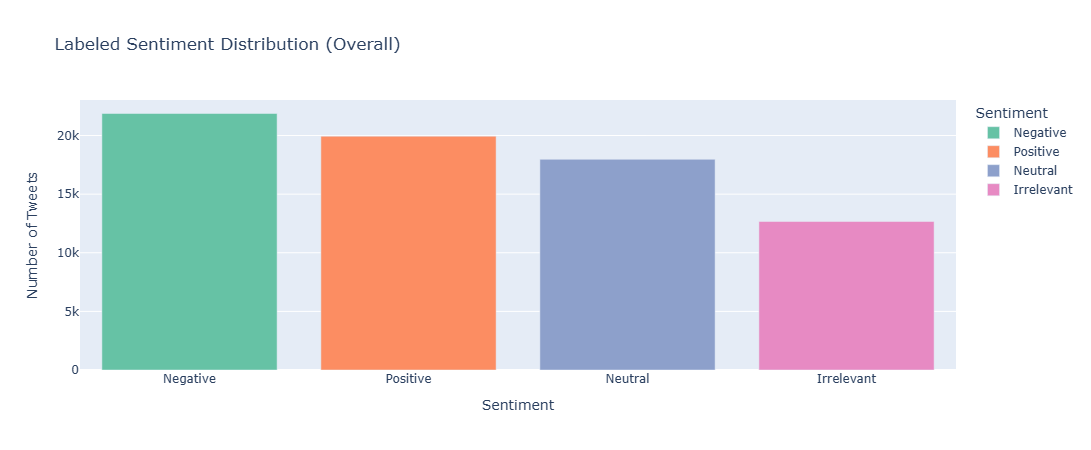

In [51]:
# Count sentiment values
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Tweet Count']

# Bar chart for Sentiment Distribution
fig = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Tweet Count',
    color='Sentiment',
    title='Labeled Sentiment Distribution (Overall)',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    xaxis_title='Sentiment', 
    yaxis_title='Number of Tweets',
    height = 450,
    width = 650,
)
fig.show()


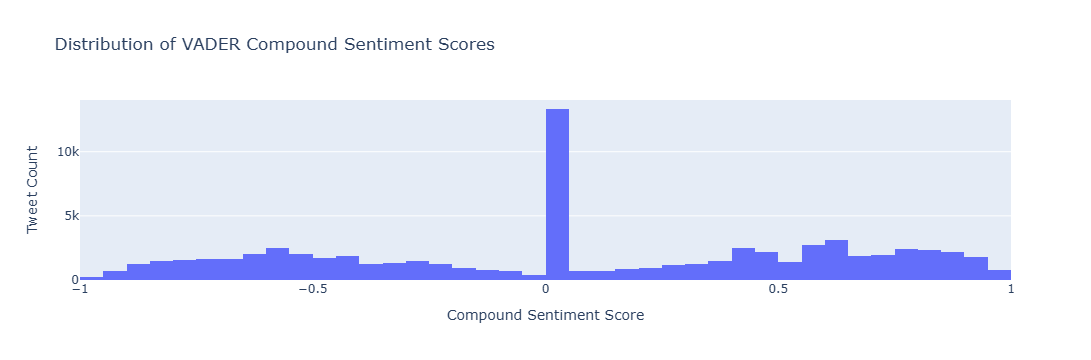

In [52]:
# Plot distribution of VADER sentiment scores
fig_score = px.histogram(
    df,
    x='Sentiment_Score',
    nbins=50,
    title='Distribution of VADER Compound Sentiment Scores',
    color_discrete_sequence=['#636EFA']
)
fig_score.update_layout(
    xaxis_title='Compound Sentiment Score', 
    yaxis_title='Tweet Count'
)
fig_score.show()


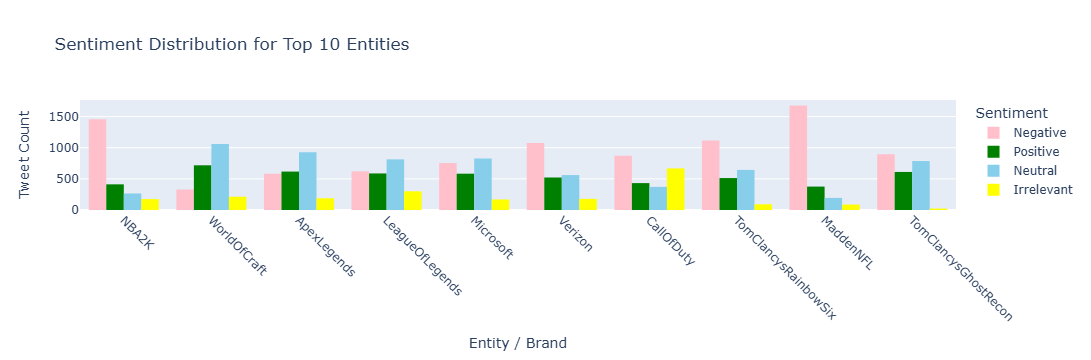

In [72]:
top_entities = df['Entity'].value_counts().head(10).index.tolist()
df_top = df[df['Entity'].isin(top_entities)]

color_map =  {
    'Negative': 'pink',
    'Positive': 'green',
    'Neutral': 'skyblue',
    'Irrelevant': 'yellow'
    }

fig = px.histogram(
    df_top,
    x = 'Entity',
    color = 'Sentiment',
    barmode = 'group',
    color_discrete_map = color_map,
    title= "Sentiment Distribution for Top 10 Entities"
)
fig.update_layout(
    xaxis_title = "Entity / Brand",
    yaxis_title = 'Tweet Count',
    legend_title = 'Sentiment',
    bargap = 0.2
)
fig.update_xaxes(tickangle = 45)
fig.show()

In [80]:
# Create sentiment summary table per brand
summary = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['% Positive'] = (summary['Positive'] / summary['Total']) * 100

# Top 20 most positively viewed brands
top_positive = summary.sort_values('% Positive', ascending=False).head(20)
print(top_positive[['Positive', 'Negative', 'Neutral', 'Irrelevant', '% Positive']])


Sentiment                  Positive  Negative  Neutral  Irrelevant  % Positive
Entity                                                                        
AssassinsCreed                 1396       367      155         257   64.183908
Borderlands                     980       415      593         239   44.005388
Cyberpunk2077                   916       364      460         467   41.504304
RedDeadRedemption(RDR)          893       291      789         205   41.000918
PlayStation5(PS5)               901       426      501         383   40.750791
CallOfDutyBlackopsColdWar       828       548      347         552   36.395604
Hearthstone                     815       517      693         220   36.302895
Nvidia                          770       511      860          86   34.575662
Xbox(Xseries)                   750       359      408         720   33.527045
HomeDepot                       736       877      333         285   32.989691
CS-GO                           727       337      5